In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [2]:
# Load and preprocess data
data2 = pd.read_csv("C:/Users/User/Bank Transactions Analysis/BankTransactionData_Cleaned.csv")

# Display the first few rows of the dataset
print("Dataset Preview:\n", data2.head())

Dataset Preview:
   TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor    

In [3]:
# Unwanted columns
unwanted_columns = data2.drop(columns = ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'PreviousTransactionDate', 'CustomerOccupation'])
unwanted_columns.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70,81,1,5112.21
1,376.24,68,141,1,13758.91
2,126.29,19,56,1,1122.35
3,184.50,26,25,1,8569.06
4,13.45,26,198,1,7429.40


In [4]:
# Scaling the Dataset
for col in unwanted_columns:
    avg = unwanted_columns[col].mean()
    sd = unwanted_columns[col].std()
    unwanted_columns[col] = unwanted_columns[col].apply(lambda x: (x - avg) / sd)
unwanted_columns.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971082,1.423435,-0.552333,-0.206752,-0.000537
1,0.269386,1.311026,0.305254,-0.206752,2.216030
2,-0.586765,-1.442990,-0.909661,-0.206752,-1.023330
3,-0.387379,-1.049559,-1.352748,-0.206752,0.885621
4,-0.973274,-1.049559,1.119961,-0.206752,0.593471


In [5]:
#K-means implememntation
KM = KMeans(n_clusters=3, random_state=42) 
unwanted_columns['Cluster'] = KM.fit_predict(unwanted_columns)

unwanted_columns.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
0,-0.971082,1.423435,-0.552333,-0.206752,-0.000537,2
1,0.269386,1.311026,0.305254,-0.206752,2.216030,2
2,-0.586765,-1.442990,-0.909661,-0.206752,-1.023330,1
3,-0.387379,-1.049559,-1.352748,-0.206752,0.885621,1
4,-0.973274,-1.049559,1.119961,-0.206752,0.593471,1


In [7]:
# No pf samples in each cluster
unwanted_columns.Cluster.value_counts()

2    1469
1     948
0      95
Name: Cluster, dtype: int64

In [15]:
# Kmeans using Elbow Method
dist_df = []

# Loop through a range of cluster numbers to calculate inertia
for num_clusters in range(1, 11): 
    km = KMeans(n_clusters=num_clusters)
    km.fit(unwanted_columns)  
    dist_df.append([num_clusters, km.inertia_]) 

# Convert results to a DataFrame
dist_df = pd.DataFrame(dist_df, columns=['number_of_clusters', 'distance'])

dist_df.head(10)

D:\Users\User\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


,number_of_clusters,distance
0,1,13367.457006
1,2,10329.663347
2,3,7960.811494
3,4,6752.076051
4,5,5849.606008
5,6,5112.645413
6,7,4609.326901
7,8,4311.950868
8,9,4083.088630
9,10,3860.147271


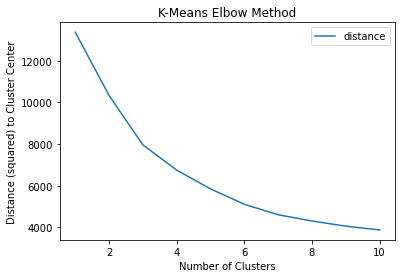

In [11]:
# Plot the Elbow Curve
dist_df.set_index("number_of_clusters").plot()  # Set index for plotting
plt.xlabel("Number of Clusters")
plt.ylabel("Distance (squared) to Cluster Center")
plt.title("K-Means Elbow Method")
plt.show()

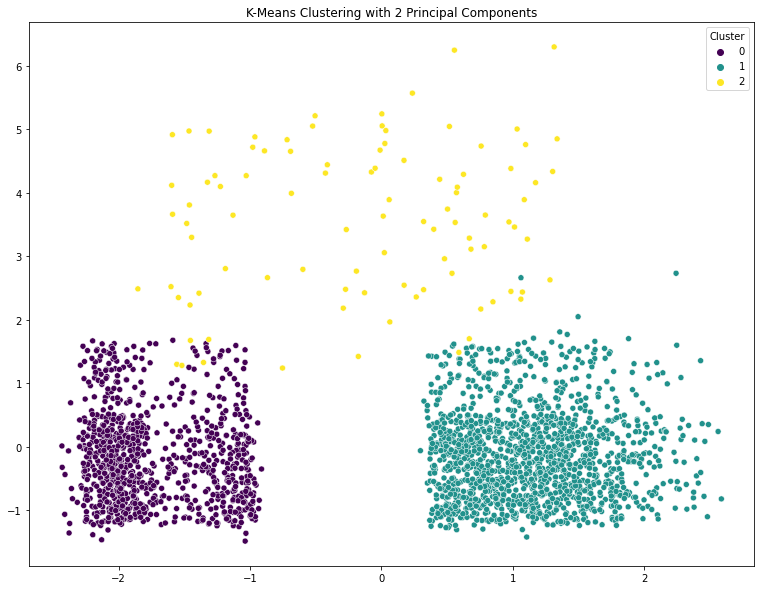

In [36]:
# Standardize features
scaler = StandardScaler()
unwanted_columns_scaled = scaler.fit_transform(unwanted_columns)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(unwanted_columns_scaled)

# Get cluster labels
unwanted_columns['Cluster'] = kmeans.labels_

pca = PCA(n_components=2)
unwanted_columns_pca = pca.fit_transform(unwanted_columns_scaled)

# Visualize clusters
plt.figure(figsize=(13, 10))
sns.scatterplot(x=unwanted_columns_pca[:, 0], y=unwanted_columns_pca[:, 1], hue=unwanted_columns['Cluster'], palette='viridis')
plt.title("K-Means Clustering with 2 Principal Components")
plt.show()